In [25]:
import spacy
import numpy as np
import sklearn as sks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from tqdm import tqdm

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
df=pd.read_csv("archive/IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Understanding the removal of the \<br/> tag using regex

In [5]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [6]:
re.sub(r'<br\s*/?>', '',df['review'][1] )

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [7]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

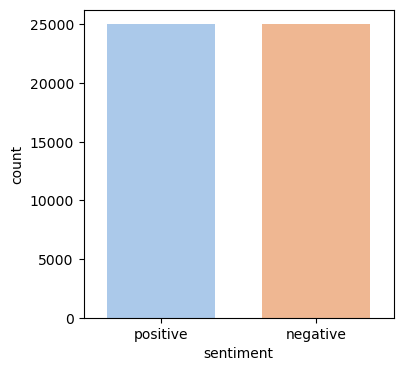

In [8]:
plt.figure(figsize=(4,4),dpi=100)
sns.countplot(x='sentiment', data=df, palette='pastel', width=0.7)

In [9]:
from wordcloud import WordCloud

# Assuming your data is in a pandas dataframe named 'data'

# Split sentences into words, creating a list of words per sentence
df['words'] = df['review'].apply(lambda x: x.split())

# Flatten the list of lists into a single list of words
all_words = [word for sentence in df['words'] for word in sentence]

# Count word frequencies
word_counts = pd.Series(all_words).value_counts()

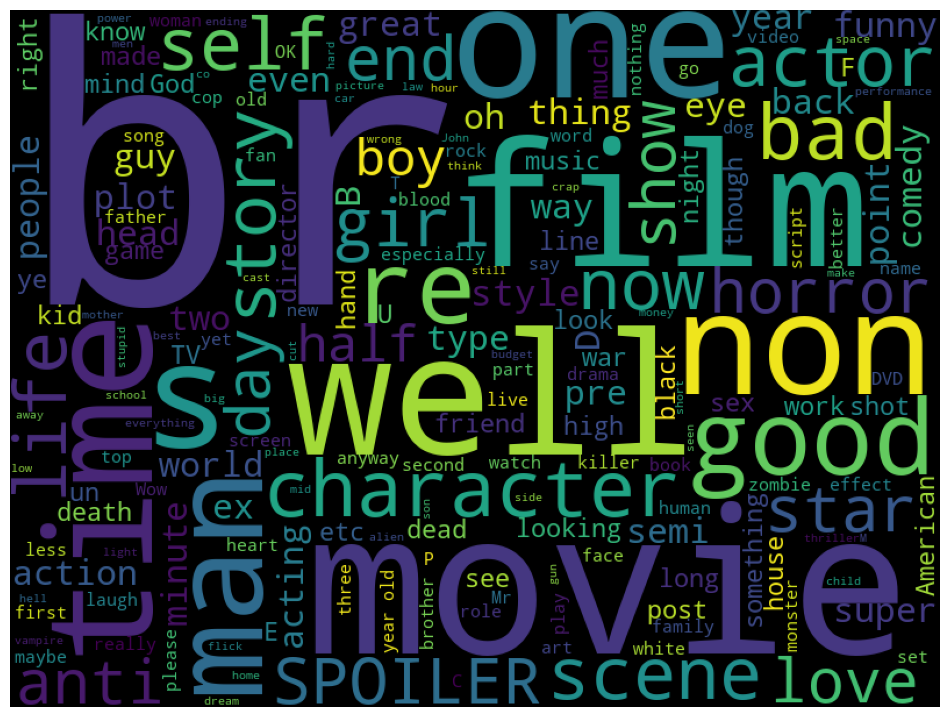

In [10]:
# Generate wordcloud
wordcloud = WordCloud(width=800, height=600).generate(word_counts.to_string())

# Plot the wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
def language_process(text):
    text=re.sub(r'<br\s*/?>', '',text)
    filtered_text=[]
    doc = nlp(text)
    for token in doc:
        if not token.is_stop and token.pos_ not in ["PRON","PROPN"] and not token.is_punct:
            filtered_text.append(token.text)
    
    return " ".join(filtered_text)

In [26]:
tqdm.pandas()
df['after_filter'] = df['review'].progress_apply(language_process)

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [39:27<00:00, 21.12it/s]


In [18]:
language_process(df['review'][1])

1


'wonderful little production filming technique unassuming- old time fashion gives comforting discomforting sense realism entire piece actors extremely got polari voices pat truly seamless editing guided references diary entries worth watching terrificly written performed piece masterful production great master comedy life realism comes home little things fantasy guard use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning sets particularly flat murals decorating surface terribly'

In [27]:
df.head()

,review,sentiment,words,after_filter
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...",reviewers mentioned watching 1 Oz episode hook...
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production., <br, /><br...",wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...",thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,"[Basically, there's, a, family, where, a, litt...",Basically family little boy thinks zombie clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei's, ""Love, in, the, Time, of, M...",Love Money visually stunning film watch offers...


In [28]:
df.to_csv('filtered_text.csv',index=False)